# Using Matplotlib to plot a trend line for Na ions in soda lime silicate glass using a least-squares fit method.
## Frederico Wieser 2/11/18

In this notebook we will be using the Matplotlib and Numpy libraries to plot Na ions in soda lime silicate glass using a least-squares fit method. We will be doing this by using the data given to us on the CSV files.


In [1]:
import numpy as np #Importing the Numpy Library.
import matplotlib.pyplot as plt #Importing the Matplotlib Library.

#Importing the CSV file into 2 seperate arrays.
#Where time is actually simulated time in picoseconds, and where mean square displacement is (10^-20 m^2)
time_pico, mean_square_displacement = np.loadtxt('Session5data.csv', unpack=True, delimiter=",")

#Shortening the variable names for the sake of ease and in writing program.
t = time_pico
m2d = mean_square_displacement

In the code above we have imported all 2 columns from the CSV file as 2 seperate arrays. It is neccessary in this program to use the ' delimiter="," ' since if we were not to use it Numpy would be trying to read our CSV file as a sting rather than an array, leading to an error since the arrays must have floats only.

# Application of Least Squares Method on Na ions in soda lime silicate glass

In [2]:
#Seting up equations least-squares fit method equations.
#m = the gradient of the line of best fit
#c = the y-intercept of the line of best fit

#Fit the data
mean_t = np.mean(t)
mean_m2d = np.mean(m2d)
m = np.sum((t - mean_t)*m2d) / np.sum((t - mean_t)*t) 
c = mean_m2d - m*mean_t
sum_of_squares = np.sum((m2d - m*t - c)**2)

#calcualting min. and max. values from the raw data
t_min = np.min(t)
t_max = np.max(t)
m2d_min = np.min(m2d)
m2d_max = np.max(m2d)


Equation for gradient using the least squares method where instead of x we use time and instead y we use mean square distance.

1) $$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$ 

Equation of y-intercept.

2) $$ c = \bar{y} - m \bar{x} $$

In [3]:
di = m2d - m*t - c #Using equation 3
D = np.sum((t - mean_t)*t) #Using equation 4
n = (np.sum(m2d) - m*np.sum(t))/c #Using equation 5
delta_m = np.sqrt((1/D)*(np.sum(di**2)/(n-2))) #Using equation 6 to calculate gradient ucnertainty
delta_c = np.sqrt(((1/n)+((mean_t**2)/D))*(np.sum(di**2)/(n-2))) #Using equation 7 to calculate intercept uncertainty

3) $$ d_i = y_i - mx_i - c $$

4) $$ D = \sum x_i (x_i - \bar{x}) $$

5) $$ n = \frac{\sum{y_i}-m\sum{x_i}}{c} $$

Equations used for the uncertainties of the gradient and the intercept, respectively.

6) $$ \Delta m = \sqrt{\frac{\sum d_i^2}{D(n-2)}}$$

7) $$ \Delta c = \sqrt{(\frac{1}{n} + \frac{\bar{x}^2}{D})\frac{\sum d_i^2}{(n-2)}}$$

# Plotting Graph

y = (2.02 +/- 0.00105)(10^-8 m^2 s^-1)x + (6.51 +/- 0.0369)(10^-20 m^2).


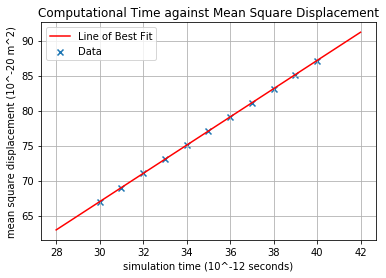

In [4]:
x = np.linspace(28,42) #Defining an arbitrary variable x to use in plotting our 
y = m*x + c

#Starting a new figure
plt.figure()
plt.scatter(t, m2d, label="Data", marker="x") #Plots time vs mean square displacement
plt.plot(x, y, label="Line of Best Fit", c="r")
plt.grid(True) #Plots a grip in the backdrop of the data to give reference for the user.
plt.legend() #Gives a small key for the reader to easily tell what data is for which crystal.
plt.title("Computational Time against Mean Square Displacement") #Setting the title of graph.
plt.xlabel("simulation time (10^-12 seconds)") #Setting the x-axis label.
plt.ylabel("mean square displacement (10^-20 m^2)") #Setting the y-axis label.
print("y = ({0:0.2f} +/- {1:0.5f})(10^-8 m^2 s^-1)x + ({2:0.2f} +/- {3:0.4f})(10^-20 m^2).".format(m,delta_m,c,delta_c))

# Calculating The Diffusion Coefficient

In [5]:
diffusion = m/6
delta_diffusion = delta_m/6
print("The diffusion coefficient D = {0:0.2f}(10^-8 m^2 s^-1) and the uncertainty in D = {1:0.5f}(10^-8 m^2 s^-1) for Na ions in this glass".format(diffusion,delta_diffusion))

The diffusion coefficient D = 0.34(10^-8 m^2 s^-1) and the uncertainty in D = 0.00018(10^-8 m^2 s^-1) for Na ions in this glass
